In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [43]:
practice0 = pd.DataFrame({"이름": ["홍길동", "김길동"], "나이": [100, 200]})

In [44]:
practice0

,이름,나이
0,홍길동,100
1,김길동,200


In [45]:
practice = pd.DataFrame({"날짜":[], "운동":[], "양":[]})   
practice 

,날짜,운동,양


In [46]:
practice.loc[0] = ['19-3-1', '달리기', 1.]
practice

,날짜,운동,양
0,19-3-1,달리기,1.0


In [47]:
# loc[행인덱스] => 행인덱스에 한 행을 추가해라.
practice.loc[0] = ['19-3-1', '달리기', 1.] 

In [48]:
practice.loc[1] = ['19-3-2', '걷기', 1.] 
practice.loc[2] = ['19-3-2', '달리기', 1.] 
practice.loc[3] = ['19-3-2', '계단오르기', 1.] 
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0


In [49]:
practice.loc[4] = ['19-3-3', '걷기', 1.5] 
practice.loc[5] = ['19-3-3', '달리기', 1.] 
practice

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [50]:
#practice.to_csv('/kaggle/input/practice/practice2.csv', encoding='utf-8')
#kaggle에서는 write가 안됨.

In [51]:
practice2 = pd.read_csv('../data/practice.csv', encoding='utf-8')
practice2

,Unnamed: 0,날짜,운동,양
0,0,19-3-1,달리기,1.0
1,1,19-3-2,걷기,1.0
2,2,19-3-2,달리기,1.0
3,3,19-3-2,계단오르기,1.0
4,4,19-3-3,걷기,1.5
5,5,19-3-3,달리기,1.0


In [52]:
practice2 = pd.read_csv('../data/practice.csv', index_col=0, encoding='utf-8')
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0


In [53]:
practice2.loc[6] = ['19-3-4', '걷기', 1.5] 
practice2.loc[7] = ['19-3-5', '달리기', 1.] 
practice2.loc[8] = ['19-3-6', '걷기', 2.5] 
practice2.loc[9] = ['19-3-6', '달리기', 0.5] 
practice2

,날짜,운동,양
0,19-3-1,달리기,1.0
1,19-3-2,걷기,1.0
2,19-3-2,달리기,1.0
3,19-3-2,계단오르기,1.0
4,19-3-3,걷기,1.5
5,19-3-3,달리기,1.0
6,19-3-4,걷기,1.5
7,19-3-5,달리기,1.0
8,19-3-6,걷기,2.5
9,19-3-6,달리기,0.5


In [54]:
practice2.pivot_table(index='운동') #avg(평균)기준!

,양
운동,
걷기,1.625
계단오르기,1.000
달리기,0.900


In [55]:
practice2.pivot_table(index='운동', aggfunc=np.sum)

,양
운동,
걷기,6.5
계단오르기,1.0
달리기,4.5


In [56]:
practice2.pivot_table(index='운동', aggfunc=[np.sum, len])

sum len     
         양  날짜    양
운동                 
걷기     6.5   4  4.0
계단오르기  1.0   1  1.0
달리기    4.5   5  5.0

In [57]:
practice2.pivot_table(index='운동', aggfunc=[np.sum, np.average, len])

sum average len     
         양       양  날짜    양
운동                         
걷기     6.5   1.625   4  4.0
계단오르기  1.0   1.000   1  1.0
달리기    4.5   0.900   5  5.0

In [58]:
prac_pivot = practice2.pivot('날짜', '운동', '양')
#                             인덱스(행), 종류(열), 테이블 가운데 채워지는 값(양)
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,NaN,NaN,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,NaN,1.0
19-3-4,1.5,NaN,NaN
19-3-5,NaN,NaN,1.0
19-3-6,2.5,NaN,0.5


In [59]:
#NaN: 행과 열에 적합한 값이 없다 => 삭제, 수치로 변환
#수치변환, 평균, 0, 기본값으로 변환

In [60]:
prac_pivot.fillna(0, inplace = True) #비파괴 함수 => 파괴 함수(변경된 부분이 원본에 반영시킴.)
prac_pivot

운동,걷기,계단오르기,달리기
날짜,,,
19-3-1,0.0,0.0,1.0
19-3-2,1.0,1.0,1.0
19-3-3,1.5,0.0,1.0
19-3-4,1.5,0.0,0.0
19-3-5,0.0,0.0,1.0
19-3-6,2.5,0.0,0.5


In [61]:
type(prac_pivot)

pandas.core.frame.DataFrame

In [62]:
not_excercise = pd.read_excel('../data/reason_not_exercise.xls')
not_excercise

,기간,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,2017,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,2017,성별,남자,55.2,7.9,5.5,29.8,1.6
2,2017,성별,여자,45.0,8.3,6.0,38.8,1.8
3,2017,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,2017,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,2017,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,2017,연령별,40대,57.7,6.8,5.2,29.4,1
7,2017,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,2017,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,2017,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [63]:
#!pip install xlrd

In [64]:
not_excercise.drop(columns='기간', inplace=True)

In [65]:
not_excercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [66]:
not_excercise.drop(index=range(22, 53), inplace=True)
not_excercise

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6
9,학력별,중졸 이하,26.1,13.7,6.6,46.2,7.4


In [67]:
not_excercise.shape#shape: 행열의 크기

(22, 7)

In [68]:
not_excercise['대분류']

0       서울시
1        성별
2        성별
3       연령별
4       연령별
5       연령별
6       연령별
7       연령별
8       연령별
9       학력별
10      학력별
11      학력별
12      학력별
13      소득별
14      소득별
15      소득별
16      소득별
17      소득별
18      소득별
19    혼인상태별
20    혼인상태별
21    혼인상태별
Name: 대분류, dtype: object

In [69]:
not_excercise['대분류'] == '성별' #브로드캐스팅

0     False
1      True
2      True
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: 대분류, dtype: bool

In [70]:
#not_excercise[] #조건을 넣기위한 []역할

In [71]:
not_excercise[not_excercise['대분류'] == '성별']

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [72]:
not_ex_sex = not_excercise[not_excercise['대분류'] == '성별'].copy()
not_ex_sex
not_excercise.loc[:2]

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
0,서울시,서울시,49.7,8.1,5.8,34.7,1.7
1,성별,남자,55.2,7.9,5.5,29.8,1.6
2,성별,여자,45.0,8.3,6.0,38.8,1.8


In [73]:
not_ex_sex.drop(columns='대분류', inplace=True)

In [74]:
not_ex_sex

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
1,남자,55.2,7.9,5.5,29.8,1.6
2,여자,45.0,8.3,6.0,38.8,1.8


In [75]:
not_ex_sex.set_index('분류', inplace=True)

In [76]:
not_ex_sex

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
남자,55.2,7.9,5.5,29.8,1.6
여자,45.0,8.3,6.0,38.8,1.8


In [77]:
import matplotlib.pyplot as plt

In [78]:
from matplotlib import font_manager, rc #한글처리

In [79]:
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)

In [80]:
plt.rcParams['axes.unicode_minus'] = False

In [81]:
def call():
    return 100, 200
print(call())

(100, 200)


In [82]:
x, y = call()
print(x, y)

100 200


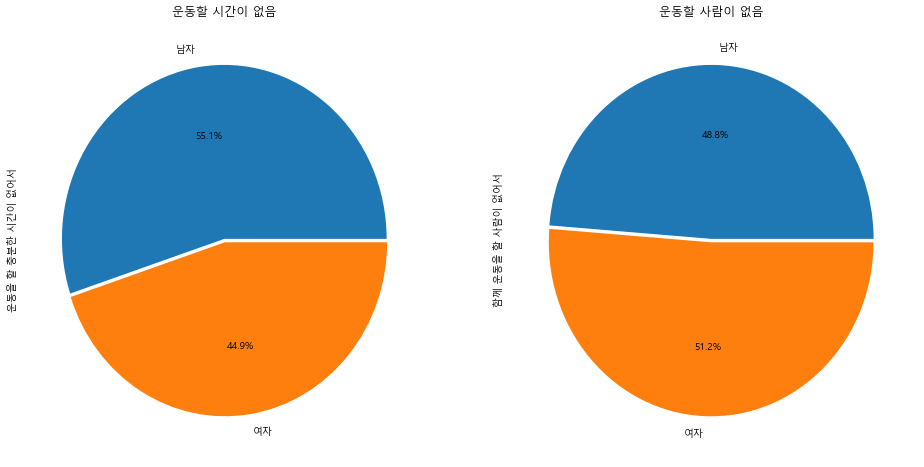

In [83]:
f, ax  = plt.subplots(1, 2, figsize=(16, 8)) #1행 2열
not_ex_sex['운동을 할 충분한 시간이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[0], autopct='%1.1f%%')
not_ex_sex['함께 운동을 할 사람이 없어서'].plot.pie(explode=[0, 0.02], ax=ax[1], autopct='%1.1f%%')
ax[0].set_title('운동할 시간이 없음')
ax[1].set_title('운동할 사람이 없음')
plt.show()

In [84]:
not_excercise[not_excercise['대분류'] == '연령별']

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [85]:
not_ex_age = not_excercise[not_excercise['대분류'] == '연령별'].copy()
not_ex_age

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,연령별,10대,55.7,6.1,5.6,32.2,0.3
4,연령별,20대,54.8,6.9,5.2,32.9,0.1
5,연령별,30대,58.1,5.5,4.6,31.6,0.2
6,연령별,40대,57.7,6.8,5.2,29.4,1
7,연령별,50대,50.1,9.2,7.2,32.2,1.4
8,연령별,60대 이상,27.5,12.8,6.9,46.8,6


In [86]:
not_ex_age.drop(columns='대분류', inplace=True)

In [87]:
not_ex_age

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
3,10대,55.7,6.1,5.6,32.2,0.3
4,20대,54.8,6.9,5.2,32.9,0.1
5,30대,58.1,5.5,4.6,31.6,0.2
6,40대,57.7,6.8,5.2,29.4,1
7,50대,50.1,9.2,7.2,32.2,1.4
8,60대 이상,27.5,12.8,6.9,46.8,6


In [88]:
not_ex_age.set_index('분류', inplace=True)

In [89]:
not_ex_age

,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
분류,,,,,
10대,55.7,6.1,5.6,32.2,0.3
20대,54.8,6.9,5.2,32.9,0.1
30대,58.1,5.5,4.6,31.6,0.2
40대,57.7,6.8,5.2,29.4,1
50대,50.1,9.2,7.2,32.2,1.4
60대 이상,27.5,12.8,6.9,46.8,6


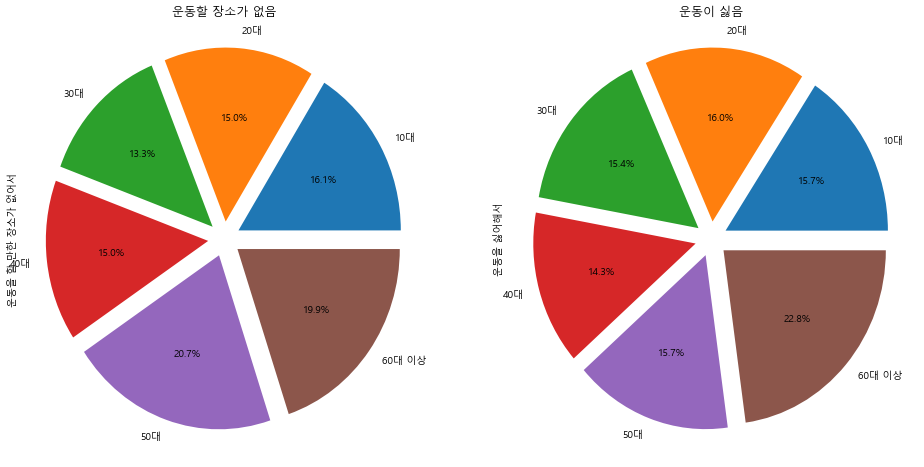

In [90]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
not_ex_age['운동을 할 만한 장소가 없어서'].plot.pie(explode=[0.1, 0.1, 0.1, 0.1,0.1, 0.1], ax=ax[0], autopct='%1.1f%%')
not_ex_age['운동을 싫어해서'].plot.pie(explode=[0.1, 0.1, 0.1, 0.1,0.1, 0.1], ax=ax[1], autopct='%1.1f%%')
ax[0].set_title('운동할 장소가 없음')
ax[1].set_title('운동이 싫음')
plt.show()

In [91]:
not_excercise[not_excercise['대분류'] == '소득별']

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
13,소득별,100만원 미만,22.7,10.3,3.6,50.7,12.7
14,소득별,100-200만원 미만,34.3,11.5,7.1,41.5,5.6
15,소득별,200-300만원 미만,48.8,12.3,6.8,30.7,1.4
16,소득별,300-400만원 미만,54.9,7.1,6.5,31.2,0.3
17,소득별,400-500만원 미만,56.1,5,5.3,33.0,0.6
18,소득별,500만원 이상,52.3,7.1,5.1,34.9,0.6


In [92]:
not_ex_cost = not_excercise[not_excercise['대분류'] == '소득별'].copy()
not_ex_cost

,대분류,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
13,소득별,100만원 미만,22.7,10.3,3.6,50.7,12.7
14,소득별,100-200만원 미만,34.3,11.5,7.1,41.5,5.6
15,소득별,200-300만원 미만,48.8,12.3,6.8,30.7,1.4
16,소득별,300-400만원 미만,54.9,7.1,6.5,31.2,0.3
17,소득별,400-500만원 미만,56.1,5,5.3,33.0,0.6
18,소득별,500만원 이상,52.3,7.1,5.1,34.9,0.6


In [93]:
not_ex_cost.drop(columns='대분류', inplace=True)

In [94]:
not_ex_cost

,분류,운동을 할 충분한 시간이 없어서,함께 운동을 할 사람이 없어서,운동을 할 만한 장소가 없어서,운동을 싫어해서,기타
13,100만원 미만,22.7,10.3,3.6,50.7,12.7
14,100-200만원 미만,34.3,11.5,7.1,41.5,5.6
15,200-300만원 미만,48.8,12.3,6.8,30.7,1.4
16,300-400만원 미만,54.9,7.1,6.5,31.2,0.3
17,400-500만원 미만,56.1,5,5.3,33.0,0.6
18,500만원 이상,52.3,7.1,5.1,34.9,0.6


In [95]:
not_ex_cost.set_index('분류', inplace=True)

In [1]:
f, ax = plt.subplots(1, 2, figsize = (16, 8))
not_ex_cost['운동을 할 만한 장소가 없어서'].plot.pie(explode=[0, 0.02, 0.04, 0.06, 0.08, 0.1], ax=ax[0], autopct='%1.1f%%')
not_ex_cost['운동을 싫어해서'].plot.pie(explode=[0, 0.02, 0.04, 0.06, 0.08, 0.1], ax=ax[1], autopct='%1.1f%%')
ax[0].set_title('운동할 장소가 없음')
ax[1].set_title('운동이 싫음')
plt.show()

NameError: name 'plt' is not defined